In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

# Loading the fresh Netflix dataset
df = pd.read_csv("netflix_titles.csv.zip")

# Previewing the data
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [17]:
# Dataset shape and info
print("Shape:", df.shape)
df.info()

# Checking the null values
df.isnull().sum()

Shape: (8807, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [18]:
# Filling the missing director and cast
df['director'].fillna('Not Available', inplace=True)
df['cast'].fillna('Not Available', inplace=True)

# Dropping rows missing 'country', 'date_added', 'rating'
df.dropna(subset=['country', 'date_added', 'rating'], inplace=True)

# Confirming the nulls handled
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
dtype: int64

In [19]:
# Converting the 'date_added' to datetime, handling errors by coercing them to NaT
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extracting year and month from the converted date column
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

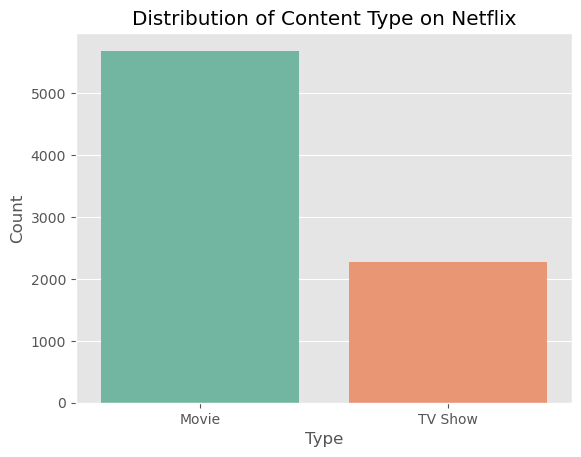

In [20]:
#content type distribution
sns.countplot(data=df, x='type', palette='Set2')
plt.title('Distribution of Content Type on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

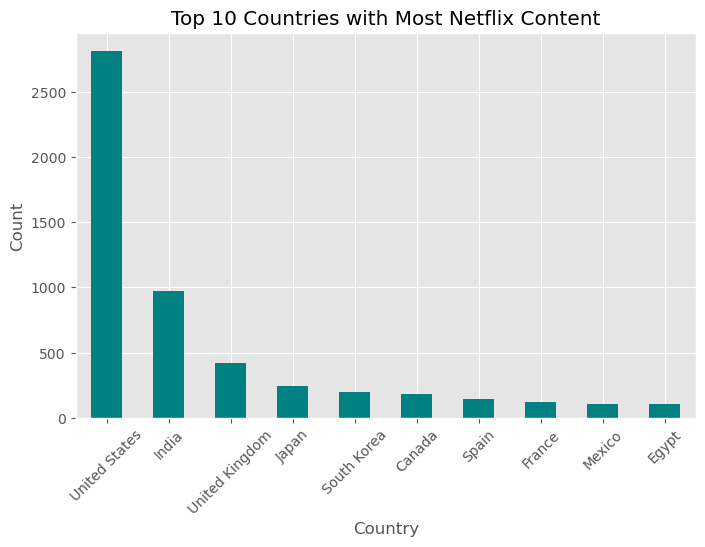

In [21]:
# top 10 countries by content
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='bar', figsize=(8,5), color='teal')
plt.title('Top 10 Countries with Most Netflix Content')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

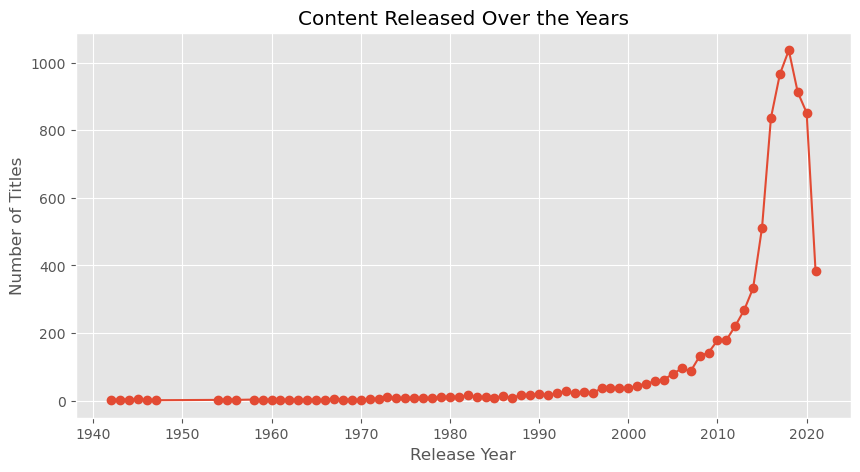

In [22]:
#content over years
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')
content_per_year = df['release_year'].value_counts().sort_index()

plt.figure(figsize=(10,5))
plt.plot(content_per_year.index, content_per_year.values, marker='o')
plt.title('Content Released Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()

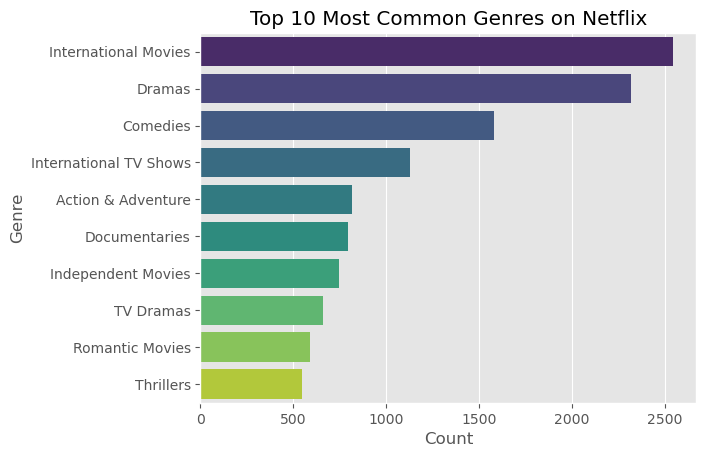

In [23]:
#Top 10 Genres (from 'listed_in')
from collections import Counter

genre_list = []
df['listed_in'].dropna().apply(lambda x: genre_list.extend(x.split(', ')))
genre_freq = Counter(genre_list).most_common(10)

genres_df = pd.DataFrame(genre_freq, columns=['Genre', 'Count'])

sns.barplot(data=genres_df, x='Count', y='Genre', palette='viridis')
plt.title('Top 10 Most Common Genres on Netflix')
plt.show()

In [25]:
print(" ~ Most content is Movies.")
print(" ~ United States dominates the Netflix library.")
print(" ~ Most content was added in recent years (2018–2020).")
print(" ~ Documentaries, Dramas, and Comedies are the top genres.")

 ~ Most content is Movies.
 ~ United States dominates the Netflix library.
 ~ Most content was added in recent years (2018–2020).
 ~ Documentaries, Dramas, and Comedies are the top genres.
